# МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ С ПОМОЩЬЮ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ НА ДАННЫХ IRIS

In [305]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

IRIS - стандартная модель для классификации ирисов с использованием логистической регрессии

# EDA

## Общая информация

In [306]:
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Описание признаков

In [307]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [308]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [309]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Частота классов

In [310]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

## Объединим признаки и целевую переменную в один Dataframe

In [311]:
df = pd.concat([X, y], axis=1)

In [312]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
135,7.7,3.0,6.1,2.3,2
75,6.6,3.0,4.4,1.4,1
34,4.9,3.1,1.5,0.2,0
91,6.1,3.0,4.6,1.4,1
1,4.9,3.0,1.4,0.2,0
55,5.7,2.8,4.5,1.3,1
28,5.2,3.4,1.4,0.2,0
94,5.6,2.7,4.2,1.3,1
125,7.2,3.2,6.0,1.8,2
67,5.8,2.7,4.1,1.0,1


## Визуализация корреляции признаков

<Axes: >

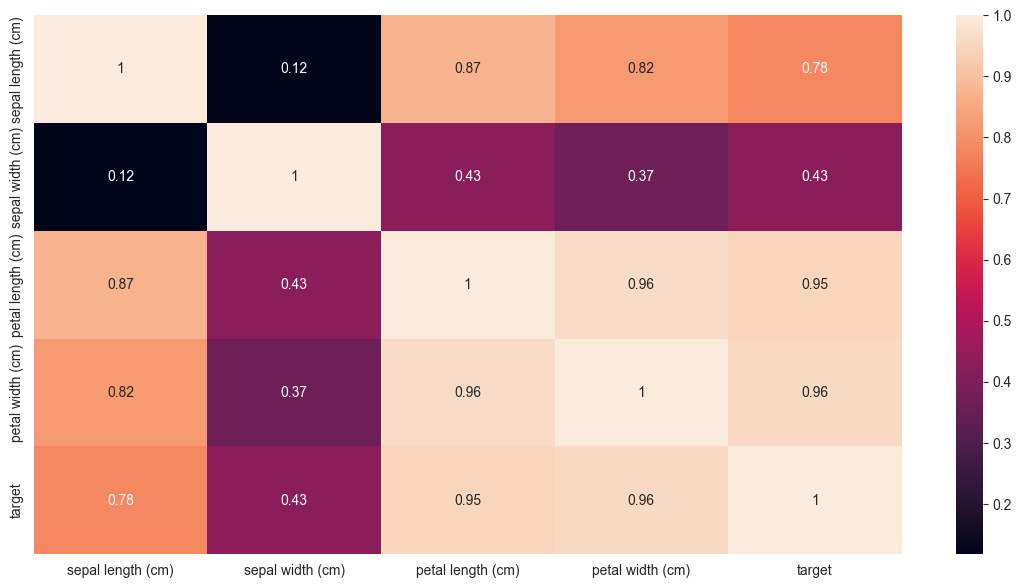

In [313]:
plt.figure(figsize=(14,7))
corr = df.corr().abs()
sns.heatmap(corr, annot=True)

Из графика видно, что на класс цветков (target) больше влияют признаки petal length и petal width. Признаки sepal length имеет меньшее, но все же значительное влияние на класс цветков. А признак sepal width имеет наименьшее влияние на класс цветков.

## Построение графиков зависимости признаков

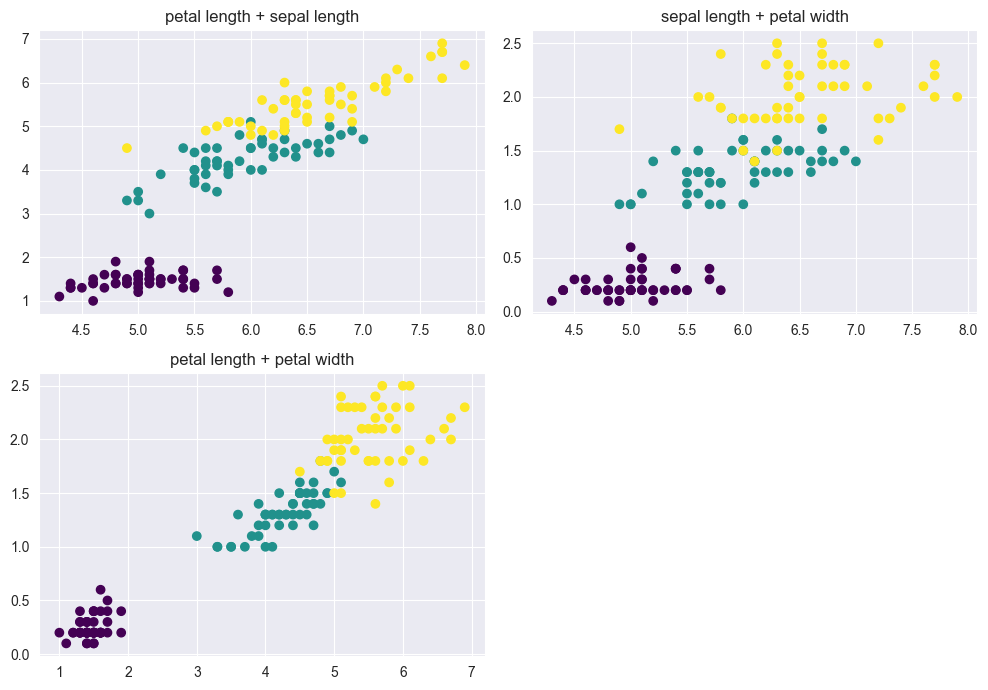

In [314]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(221)
x1 = df['sepal length (cm)']
y1 = df['petal length (cm)']
ax1.scatter(x1, y1, c=df['target'], cmap='viridis')
ax1.set_title('petal length + sepal length')

ax2 = fig.add_subplot(222)
x2 = df['sepal length (cm)']
y2 = df['petal width (cm)']
ax2.scatter(x2, y2, c=df['target'], cmap='viridis')
ax2.set_title('sepal length + petal width')

ax3 = fig.add_subplot(223)
x3 = df['petal length (cm)']
y3 = df['petal width (cm)']
ax3.scatter(x3, y3, c=df['target'], cmap='viridis')
ax3.set_title('petal length + petal width')

plt.tight_layout()
plt.show()

На графиках видно, что цветы разных видов хорошо разделяются по комбинациям признаков petal length + petal width и petal length + sepal length.
Особенно хорошо заметна группировка на графике petal length + petal width.

# Logistic Regression

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [317]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Придумаем цветок и посмотрим, к какому классу его отнесет модель

In [318]:
my_flower = [[5.1, 3.5, 1.4, 0.2]]
model.predict(my_flower)

C:\Users\ilyar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Мой цветок вероятнее всего принадлежит к классу 0, то есть Iris-setosa

In [319]:
model.predict_proba(my_flower)

C:\Users\ilyar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.76553474e-01, 2.34464768e-02, 4.89389113e-08]])

Согласно модели, вероятность того, что мой цветок принадлежит к классу 0, примерно равна 98%, а к классу 1 - примерно 2%, к классу 2 - ничтожно мала. То есть с большой долей вероятности мой цветок принадлежит к классу 0, то есть Iris-setosa.

# Оценка модели

In [320]:
y_pred = model.predict(X_test)

Так как данные распределены равномерно, можно использовать метрику accuracy

In [321]:
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy

1.0

In [322]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Вывод: данная модель логистической регрессии хорошо справляется с задачей классификации ирисов. Точность модели по предоставленным данным составляет 100%.